#### Applied Machine Learning - Mini Project 4 (Tasnim Ahmed, ta1743)

In [1]:
import sklearn 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

# 1. KMeans & KMeans++ (with Blob Data)

## K-Means

In [2]:
from sklearn.datasets import make_blobs
clusters = 4
X_blob, y_blob = make_blobs(n_samples = 300, centers = clusters, cluster_std = 0.6, random_state = 4)

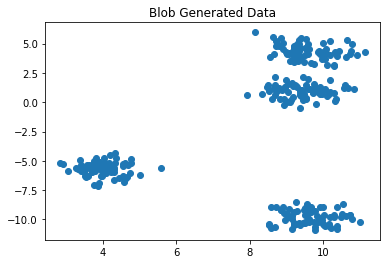

In [15]:
# plot the data
plt.figure(figsize=(6, 4))
plt.title("Blob Generated Data")
plt.scatter(X_blob[:, 0], X_blob[:, 1])
plt.show()

### Implement KMeans Function

In [16]:
def kmean_centroids(X, centroids):
    current_centroids = centroids
    centroid_update = True
    x_labels = []

    while centroid_update == True: 
        # create K clusters by assiging each point to the closest centroid
        clusters = create_clusters(X, centroids)
        
        # compute new centroid by avergaing the values in the clusters
        old_centroids = current_centroids
        current_centroids = update_centroids(clusters)
        
        # check if centroid changes, if no change then the optimum centroids have been found
        if np.array_equal(current_centroids, old_centroids):
            x_labels = sample_labels(X, clusters)
            centroid_update = False
            
    #return the optimized centroids and the labels for each sample
    return current_centroids, x_labels, clusters

# each observation gets the label of the cluster that it was assigned to
def sample_labels(X, clusters):
   
   # x_labels = np.empty(X.shape[0])
    #for i in range(len(clusters)):
       # for sample in clusters[i]:
            #find the index of that sample and use that index to set the cluster label in x_labels
            #x_labels[np.where(X == sample)[0][0]] = i
            
    #return x_labels
 
    X_list = X.tolist()
    x_labels = np.zeros(X.shape[0])
    for i in range(len(clusters)):
        for sample in clusters[i]:
            sample = sample.tolist()
            x_labels[X_list.index(sample)] = i
    return x_labels

# for each point we calculate the distance, check the one that is closest and assign it to that cluster
def create_clusters(X, centroids):
    clusters = [[] for i in range(len(centroids))]
    for i in range(len(X)):
        X_distances = {}
        for j in range(len(centroids)): 
            X_distances[j] = np.sqrt(np.sum((X[i] - centroids[j])**2))

        #find the min value in the dictionary and assign the point to the corresponding cluster
        min_dist = min(X_distances, key = X_distances.get)
        clusters[min_dist].append(X[i])

    return clusters

def update_centroids(clusters):
    # get the mean of the clusters and assign it as the centroid of that cluster
    centroids = []
    for i in range(len(clusters)):
        avg = np.mean(clusters[i], axis = 0)
        centroids.append(avg)
    return centroids

def plot_graph(title, centroids, X, y = None):
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c = y)
    for i in range(len(centroids)):
        plt.scatter(centroids[i][0],centroids[i][1], c = "0")
    plt.show()

#### Default Seed

In [13]:
np.random.seed()  
initial_centroids = X_blob[np.random.choice(X_blob.shape[0], 4)] #randomly generated centroid indices

updated_centroids, labels, clusters = kmean_centroids(X_blob, initial_centroids)
for i in range(100):
    updated_centroids, labels, clusters = kmean_centroids(X_blob, updated_centroids)

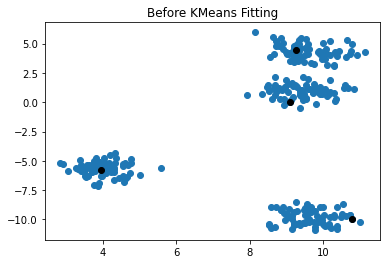

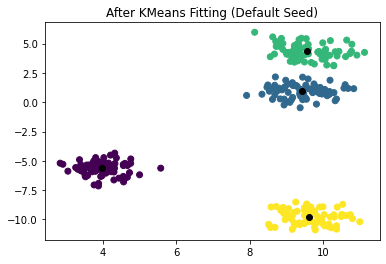

In [17]:
# plot the graph with initial centroids
plot_graph("Before KMeans Fitting", initial_centroids, X_blob)
# plot the graph with the updated centroids
plot_graph("After KMeans Fitting (Default Seed)", updated_centroids, X_blob, labels)

#### Seed = 2

In [18]:
# seed = 2
np.random.seed(2)
initial_centroids_2 = X_blob[np.random.choice(X_blob.shape[0], 4)]   # randomly generated centroids 

updated_centroids_2, labels_2, clusters_2 = kmean_centroids(X_blob, initial_centroids_2)
for i in range(100):
    updated_centroids_2, labels_2, clusters_2 = kmean_centroids(X_blob, updated_centroids_2)

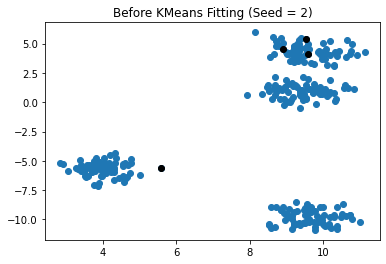

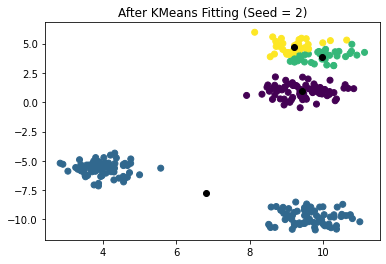

In [19]:
# plot the graph with the randomized centroids
plot_graph("Before KMeans Fitting (Seed = 2)", initial_centroids_2, X_blob)

# plot the graph with the updated centroids
plot_graph("After KMeans Fitting (Seed = 2)", updated_centroids_2, X_blob, labels_2)

### Default Seed and Seed = 2 Result Comparison

They are different because in default seed it is randomized

### Implementing K-Means ++ Function

In [21]:
def kmeanplus_centroids(X, centroid, K):
    initial_centroids = centroid
    for i in range(K - 1):
        distances = []
        for j in range(len(X)):
            d = 99999
            
            for k in range(len(initial_centroids)):
                calc_distance = np.sqrt(np.sum((X[j] - initial_centroids[k])**2))
                if calc_distance < d: 
                    d = calc_distance
                
            distances.append(d)
        
        distances = np.array(distances)
        max_dist = X[np.argmax(distances)] # find the point with the maximum distance and make it the new centroid 
        initial_centroids.append(max_dist)
        
    updated_centroid, x_labels, clusters = kmean_centroids(X, initial_centroids)
    
    return updated_centroid, x_labels, initial_centroids, clusters

In [23]:
# Default Seed
np.random.seed()

centroid_idx = np.random.choice(X_blob.shape[0], 1)
random_centroid = [X_blob[centroid_idx][0].tolist()]

updated_centroids, x_labels, initial_centroids, clusters  = kmeanplus_centroids(X_blob, random_centroid, 4)
for i in range(100):
    updated_centroids, x_labels, clusters = kmean_centroids(X_blob, updated_centroids)

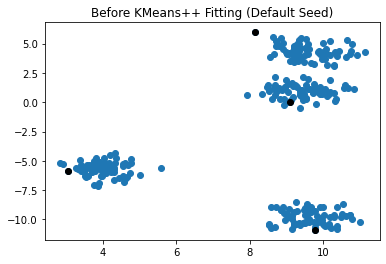

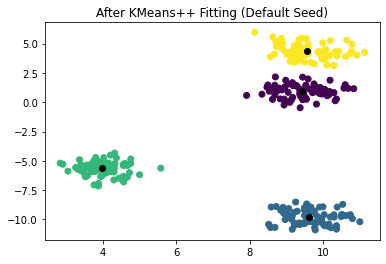

In [24]:
# plot the graph with the updated centroids
plot_graph("Before KMeans++ Fitting (Default Seed)", initial_centroids, X_blob)

# plot the graph with the updated centroids
plot_graph("After KMeans++ Fitting (Default Seed)", updated_centroids, X_blob, x_labels)

In [25]:
# Seed = 2
np.random.seed(2)

centroid_idx_2 = np.random.choice(X_blob.shape[0], 1)
random_centroid_2 = [X_blob[centroid_idx_2][0].tolist()]

updated_centroids_2, x_labels_2, initial_centroids_2, clusters = kmeanplus_centroids(X_blob, random_centroid_2, 4)
for i in range(100):
    updated_centroids_2, x_labels_2, clusters = kmean_centroids(X_blob, updated_centroids_2)

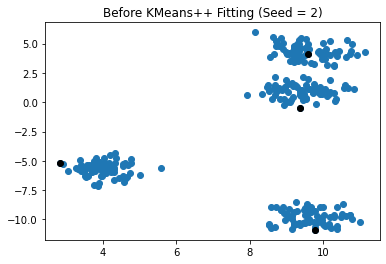

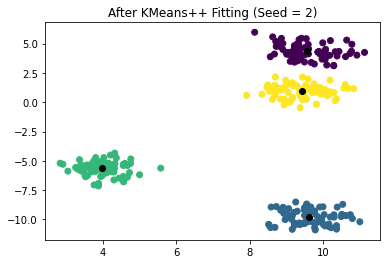

In [26]:
# plot the graph with the updated centroids
plot_graph("Before KMeans++ Fitting (Seed = 2)", initial_centroids_2, X_blob)

# plot the graph with the updated centroids
plot_graph("After KMeans++ Fitting (Seed = 2)", updated_centroids_2, X_blob, x_labels_2)

# 2. RGB Image Cluster

In [27]:
from PIL import Image 
import cv2
from numpy import asarray

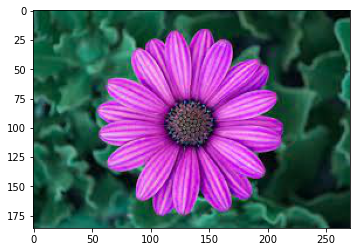

In [28]:
image = Image.open('flower.jpeg', mode = 'r') 
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB) #it is a 3d array

plt.imshow(image_copy)

In [29]:
image_pixels = np.float32(image_copy.reshape(image_copy.shape[0]*image_copy.shape[1], image_copy.shape[2]))

### KMeans Implementation

In [207]:
def image_cluster_labels(X, clusters):
    image_pixels_list = X.tolist()
    cluster_pixels = np.zeros(X.shape[0])
    for i in range(len(clusters)):
        cluster_average = np.mean(clusters[i], axis = 0)
        for pixel in clusters[i]:
            pixel = pixel.tolist()
            cluster_pixels[image_pixels_list.index(pixel)] = i
    return cluster_pixels

#### Default Seed 

In [34]:
np.random.seed() # default seed 
k = 16           # number of clusters

random_centroids = image_pixels[np.random.choice(image_pixels.shape[0], k)]
updated_centroids, labels, clusters = kmean_centroids(image_pixels, random_centroids)

In [35]:
updated_centroids = np.array(updated_centroids)
rgb_centroids = updated_centroids.round(0).astype(int)

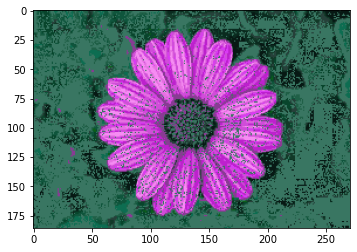

In [36]:
cluster_pixels = labels.round(0).astype(int)
compressed_pixels = rgb_centroids[cluster_pixels]
compressed_image = np.reshape(compressed_pixels, (image_copy.shape[0], image_copy.shape[1], image_copy.shape[2]))
plt.imshow(compressed_image)

#### Seed  = 2

In [211]:
np.random.seed(2) # default seed 

random_centroids_2 = image_pixels[np.random.choice(image_pixels.shape[0], k)]
updated_centroids_2, labels, clusters_2 = kmean_centroids(image_pixels, random_centroids)

rgb_centroids_2 = np.array(updated_centroids_2).round(0).astype(int)

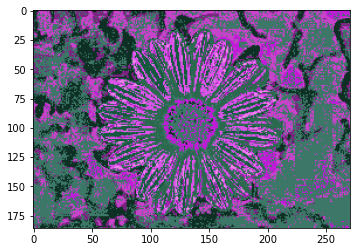

In [212]:
cluster_pixels = image_cluster_labels(image_pixels, clusters_2)
cluster_pixels = cluster_pixels.round(0).astype(int)
compressed_pixels = rgb_centroids[cluster_pixels]
compressed_image = np.reshape(compressed_pixels, (image_copy.shape[0], image_copy.shape[1], image_copy.shape[2]))
plt.imshow(compressed_image)

### KMeans++ Implementation

#### Default Seed

In [229]:
np.random.seed() # default seed 
k = 10           # number of clusters

centroid_idx = np.random.choice(image_pixels.shape[0], 1)
random_centroid = [image_pixels[centroid_idx][0].tolist()]

updated_centroids, labels, initial_centroids, clusters  = kmeanplus_centroids(image_pixels, random_centroid, k)
rgb_centroids = np.array(updated_centroids).round(0).astype(int)

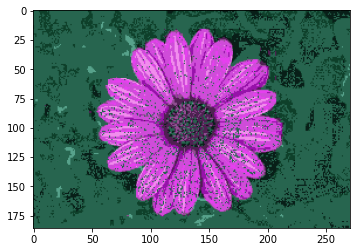

In [238]:
cluster_pixels = image_cluster_labels(image_pixels, clusters)
cluster_pixels = cluster_pixels.round(0).astype(int)
compressed_pixels = rgb_centroids[cluster_pixels]
compressed_image = np.reshape(compressed_pixels, (image_copy.shape[0], image_copy.shape[1], image_copy.shape[2]))
plt.imshow(compressed_image)

#### Seed = 2

In [239]:
np.random.seed(2) # default seed 
k = 10           # number of clusters

centroid_idx = np.random.choice(image_pixels.shape[0], 1)
random_centroid = [image_pixels[centroid_idx][0].tolist()]

updated_centroids, labels, initial_centroids, clusters  = kmeanplus_centroids(image_pixels, random_centroid, k)
rgb_centroids = np.array(updated_centroids).round(0).astype(int)

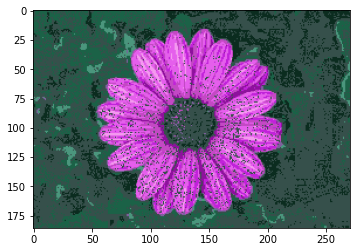

In [240]:
cluster_pixels = image_cluster_labels(image_pixels, clusters)
cluster_pixels = cluster_pixels.round(0).astype(int)
compressed_pixels = rgb_centroids[cluster_pixels]
compressed_image = np.reshape(compressed_pixels, (image_copy.shape[0], image_copy.shape[1], image_copy.shape[2]))
plt.imshow(compressed_image)

#### Comparison and Analysis

# 3.  PCA Part 1 (Users to Movies)

In [230]:
from mpl_toolkits import mplot3d

In [231]:
m = np.array([[1,1,1,0,0],
            [3,3,3,0,0],
            [4,4,4,0,0],
            [5,5,5,0,0],
            [0,2,0,4,4],
            [0,0,0,5,5],
            [0,1,0,2,2]])

In [522]:
x_array = []
y_array = []
z_array = []
for x in range(len(m)):
    for y in range(len(m[x])):
        x_array.append(x)
        y_array.append(y)
        z_array.append(m[x][y])

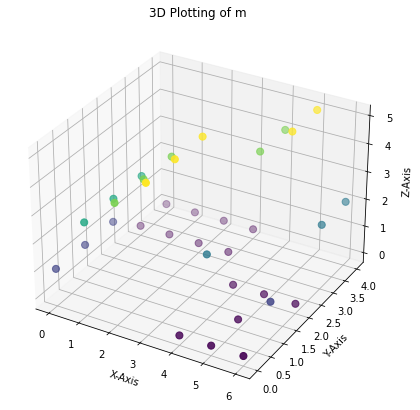

In [526]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection='3d')
ax.set_title('3D Plotting of m')
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')
ax.scatter3D(x_array, y_array, z_array, c = z_array,  s = 50);

In [273]:
# Pre-processing the data - centering the data
mean = np.mean(m, axis = 0)
m_centered = m - mean

In [295]:
# Function for choosing the number of principal components
def max_variance(e_vals):
    var = 0
    selected_var = []
    for i in range(len(e_vals)):
        var_proportion = e_vals[i] / np.sum(e_vals)
        selected_var.append(i)
        var += var_proportion
    
        if var > 0.9:
            break
    return selected_var

#### Implementing PCA with SVD

In [305]:
#svd solution
unitary, sigma, v = np.linalg.svd(m_centered)
eig_values = sigma**2

#add components until variances is 90% - try a while loop here
selected_var = max_variance(eig_values)

In [ ]:
# Plot eigenvalues, K number choice, explanation

In [308]:
k = len(selected_var)
projection_matrix = v[:,:k]

# Project onto the chosen eigenvector space
# . Calculate the compressed data with the K you choose from step 4
m_pca = np.dot(m_centered, projection_matrix)

In [312]:
print("Shape of m before PCA: ", m.shape)
print("Shape of m after PCA: ", m_pca.shape)

Shape of m before PCA:  (7, 5)
Shape of m after PCA:  (7, 2)


#### Implementing PCA with Covariance Matrix

In [350]:
# covariance matrix
#covariance_matrix = np.cov(m_centered)
covariance_matrix = np.matmul(m_centered.T, m_centered)

#eigen vectors and eigen values
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

#sort the eigenvectors and the eigenvalues - from big to small 
sort_idx = np.argsort(eig_vals)[::-1]    
eig_vals_sort = eig_vals[sort_idx]
eig_vecs_sort = eig_vec[sort_idx]

# add components until variances is 90%
selected_var = max_variance(eig_vals_sort)

In [353]:
k = len(selected_var)
projection_matrix = eig_vecs_sort[:,:k]

# Project onto the eigenvector space
m_pca = np.dot(m_centered, projection_matrix)

In [354]:
print("Shape of m before PCA: ", m.shape)
print("Shape of m after PCA: ", m_pca.shape)

Shape of m before PCA:  (7, 5)
Shape of m after PCA:  (7, 2)


In [356]:
# Print eigen vectors and eigen values
print("Eigen Values:")
print(eig_vals_sort)

print("Eigen Vectors:")
print(eig_vecs_sort)

Eigen Values:
[1.10092534e+02 1.67255279e+01 1.75336647e+00 1.18952306e-15
 0.00000000e+00]
Eigen Vectors:
[[ 0.06307575+0.j          0.27413233+0.j          0.37966062+0.j
   0.48518891+0.j         -0.40715823+0.j         -0.570094  +0.j
  -0.22480539+0.j        ]
 [ 0.97262389+0.j         -0.03813864+0.j         -0.02944657+0.j
  -0.02075451+0.j          0.18909668+0.j         -0.10767512+0.j
   0.06244093+0.j        ]
 [-0.06111157+0.j         -0.13140483+0.j          0.84044593+0.j
   0.1617132 +0.j          0.30620538+0.j          0.38687842+0.j
   0.05532607+0.j        ]
 [-0.22366093+0.j         -0.08854227+0.j         -0.02098294+0.j
   0.04657639+0.j          0.70749119+0.j         -0.6290169 +0.j
   0.20813546+0.j        ]
 [-0.20403242-0.14932807j  0.67121129+0.j         -0.42211959-0.0306092j
   0.03236879+0.27489685j -0.02245086-0.10585728j  0.01188702+0.1001551j
   0.12872618+0.43744352j]]


# 4. PCA Part 2 (Human Faces)

In [544]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70)

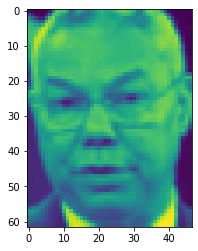

In [545]:
#fourth_image = lfw_people.images[3]
fourth_image_data = lfw_people.data[3]
fourth_image = fourth_image_data.reshape(lfw_people.images[3].shape)
plt.imshow(fourth_image)

In [546]:
X_data = lfw_people.data
X_mean = np.mean(X_data, axis = 0)

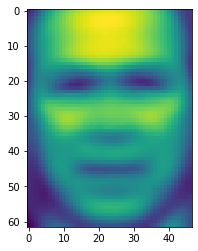

In [547]:
# Displaying the mean image
mean_image = X_mean.reshape(fourth_image.shape)
plt.imshow(mean_image)

In [548]:
# Centering the data
X_centered = X_data - X_mean

#### Implementing with Covariance Matric

In [549]:
# covariance matrix
covariance_matrix = np.matmul(X_centered.T, X_centered)

#eigen vectors and eigen values
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

#sort the eigenvectors and the eigenvalues - from big to small 
sort_idx = np.argsort(eig_vals)[::-1]    
eig_vals = eig_vals[sort_idx]
eig_vecs = eig_vec[sort_idx]

In [550]:
print(eig_vecs)

[[ 0.00537343  0.00569514  0.00613803 ...  0.01043273  0.00883074
   0.00740469]
 [ 0.01745991  0.01647563  0.01628433 ... -0.03319881 -0.03265479
  -0.03142723]
 [ 0.01783969  0.01602544  0.01488798 ...  0.03723508  0.03316043
   0.03093169]
 ...
 [ 0.00534364 -0.00370432 -0.00645101 ...  0.00036629 -0.00711183
   0.00346065]
 [-0.01115521  0.00241823 -0.00962508 ... -0.01217516  0.01043674
   0.00136792]
 [ 0.00428472 -0.00292367  0.01014441 ... -0.01153232  0.00145904
   0.00710013]]


#### Top 5 PCA

In [552]:
pca_n = 5
top5 = np.argsort(eig_vals)[::-1][:pca_n]
projection_matrix = eig_vecs[top5]
top5_eig_val = eig_vals[top5]

# projecting the data
X_proj = np.matmul(X_centered, projection_matrix.T)

print("Attributes: ", X_proj[3])

# Getting the transormed image data
X_projected = X_proj.dot(projection_matrix) + X_mean
X_project_image = X_projected[3].reshape(fourth_image.shape)

Attributes:  [-202.54205  -261.47714  -418.97372    29.398773   39.785347]


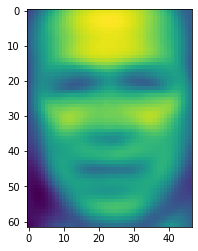

In [541]:
plt.imshow(X_project_image)

#### Top 50 PCA

In [528]:
pca_n = 50
top5 = np.argsort(eig_vals)[::-1][:pca_n]
projection_matrix = eig_vecs[top5]
top5_eig_val = eig_vals[top5]

# projecting the data
X_projected = np.matmul(X_centered, projection_matrix.T)

print("Attributes: ", X_projected[3])

# Getting the transormed image data
X_projected = X_projected.dot(projection_matrix) + X_mean
X_project_image = X_projected[3].reshape(fourth_image.shape)

Attributes:  [-202.54205   -261.47714   -418.97372     29.398773    39.785347
  616.43774    318.06607      7.3573074 -537.82715    -77.623856
 -744.33997     12.989618   413.10834    594.75165   -408.67105
  -73.56003   -391.36688   -435.80618    617.1358     311.41565
  335.18234   -452.38675   -190.78978    432.7858     181.27576
 -240.39502   -296.41394    141.63599    -13.804939   -89.5878
  -73.40282    -34.710335  -284.48932    133.53021    126.52868
 -219.94601   -123.206406    74.72778    -59.832603   -80.10553
 -104.45729    190.578      -50.27673     -2.427185    55.918587
  -56.919983  -219.15686     62.83644     72.263466    99.574776 ]


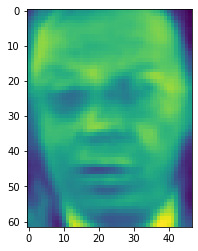

In [529]:
plt.imshow(X_project_image)

#### 